# Data Analysis jobs.ch & itjobs.ch
data from 8.1.2025

In [107]:
import pandas as pd
import json
import os
import seaborn as sns
import re
import matplotlib.pyplot as plt 

In [108]:
parent_dir = os.getcwd()

file_path = os.path.join(parent_dir, '..', 'data', 'jobs_processed.json')

with open(file_path, 'r') as file:
    jobs = json.load(file)

df = pd.DataFrame(jobs)

df.head()

,descriptions,downloaded,job_title,search_query,url,career_stage_cleaned,canton,programming_languages,frameworks,tools,...,company,place_of_work,publication_date,website,job_title_cleaned,job_category,contract_type,language,workload,salary
0,[],True,Prime Named Account Executive,software engineer,https://www.jobs.ch/en/vacancies/detail/6557a7...,None,None,[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[{'1': []}],True,System Engineer Sharepoint (f/m/d) 100%,all jobs,https://www.itjobs.ch/jobs/system-engineer-sha...,None,Zürich,[],[],[],...,Bank Julius Bär & Co. AG,Zürich,24 January 2025,ITJobs,System Engineer,Cloud/System Engineer,NaN,NaN,NaN,NaN
2,[{'0': ['Technischer Support: Unterstütze vor ...,True,Technical Support Engineer (m/w/d),software engineer,https://www.jobs.ch/en/vacancies/detail/7259e7...,None,None,[],[],[],...,Rocken®,Effretikon,06 January 2025,Jobs,NaN,NaN,Unlimited employment,German (Fluent),80 – 100%,NaN
3,[],True,Technischer Einkäufer 60-70% (El.Ing./MBA),data engineer,https://www.jobs.ch/en/vacancies/detail/a4e7cd...,None,None,[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[{'1': []}],True,System Engineer (all genders) mit fachlicher F...,all jobs,https://www.itjobs.ch/jobs/system-engineer-all...,None,Zürich,[],[],[],...,Nexus Personal- & Unternehmensberatung AG,Zürich,11 February 2025,ITJobs,System Engineer,Cloud/System Engineer,NaN,NaN,NaN,NaN


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4401 entries, 0 to 4400
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   descriptions           4401 non-null   object
 1   downloaded             4401 non-null   bool  
 2   job_title              4401 non-null   object
 3   search_query           4401 non-null   object
 4   url                    4401 non-null   object
 5   career_stage_cleaned   770 non-null    object
 6   canton                 868 non-null    object
 7   programming_languages  4401 non-null   object
 8   frameworks             4401 non-null   object
 9   tools                  4401 non-null   object
 10  operating_systems      4401 non-null   object
 11  years                  4401 non-null   object
 12  education              4401 non-null   object
 13  company                3289 non-null   object
 14  place_of_work          1969 non-null   object
 15  publication_date     

In [110]:
# data cleaning
df['publication_date'] = pd.to_datetime(df['publication_date'] , format='mixed')
df["years"] = df["years"].apply(lambda x: [i for i in x if i <20]) # filter experience larger than 20 out
df["max_years"] = df["years"].apply(lambda x: max(x) if x else 0)
df["career_stage_cleaned"] = df["career_stage_cleaned"].apply(lambda x: x if x else "Not Explicit")


In [111]:

for i in df['job_title'][df['job_title_cleaned'].isnull()]:
    print(i)


Prime Named Account Executive
Technical Support Engineer (m/w/d)
Technischer Einkäufer 60-70% (El.Ing./MBA)
Associate / Scientist Solid Form Screening (temporary for 3 years)
Lab-Scientist Chemical Synthesis / Laborwissenschaftler/in chemische Synthese
Senior Consultant Marketing Services (m/w/d) 100%
Applikationsbetreuer / Applikationsbetreuerin M-KIS (a) 100%
Berater und Entwickler D365 Project Operations (m/w/d) 50-100%
ABAP/Fiori EntwicklerIn
Process Engineer
IAM Role Engineer (Ref. 2755)
System/Product Engineer in System Integration
Development Engineer - Control Systems
Lead Security & Risks (CISO)
OnSite Supporter 100% (LU/BE)
Projektleiter*in Rohrleitungsbau 100% (w/m/d)
Lackierer in der Pharmabranche (m/w/d) 100%
IAM Engineer 80–100 %
SAP HXM Senior Architekt/Developer (m/w/d)
Bauingenieur/in Geotechnik/Spezialtiefbau (80-100%)
AV-Planer:in mit Hörsaalsupport (m/w/d)
FTTX-Netzwerkplaner
Développeur
Value and Cost Engineer
Supply Chain Process Engineer / Project Manager (m/w/d)

In [112]:
df["workload"].value_counts()

workload
80 – 100%    747
100%         578
60 – 100%     54
40 – 100%     16
50 – 100%     10
80%            8
60%            7
70 – 100%      6
60 – 80%       4
40 – 60%       4
50%            3
90 – 100%      2
40%            2
20 – 40%       2
20 – 100%      1
50 – 60%       1
20%            1
90%            1
60 – 70%       1
5%             1
30%            1
50 – 70%       1
40 – 50%       1
Name: count, dtype: int64

In [113]:
df_small = df[df['job_title_cleaned'].notnull()] # filter only jobs that are CS related (by job title)
df_small = df_small[df_small['publication_date']>='2025-01-01'] # filter only jobs that are published after 2020

In [114]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
Index: 865 entries, 1 to 4400
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   descriptions           865 non-null    object        
 1   downloaded             865 non-null    bool          
 2   job_title              865 non-null    object        
 3   search_query           865 non-null    object        
 4   url                    865 non-null    object        
 5   career_stage_cleaned   865 non-null    object        
 6   canton                 427 non-null    object        
 7   programming_languages  865 non-null    object        
 8   frameworks             865 non-null    object        
 9   tools                  865 non-null    object        
 10  operating_systems      865 non-null    object        
 11  years                  865 non-null    object        
 12  education              865 non-null    object        
 13  company  

## Job title

Text(0, 0.5, 'Job Title')

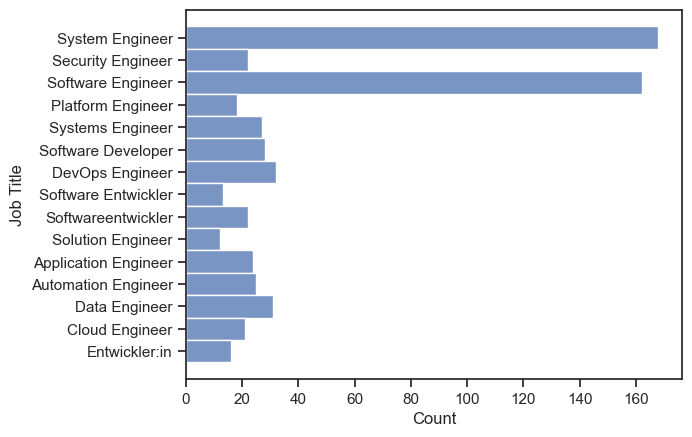

In [115]:
sns.set_theme(style="ticks")
job_counts = df_small['job_title_cleaned'].value_counts()
sns.histplot(data = df_small[df_small['job_title_cleaned'].isin(job_counts.nlargest(15).index)], y = "job_title_cleaned")
plt.xlabel('Count')
plt.ylabel('Job Title')


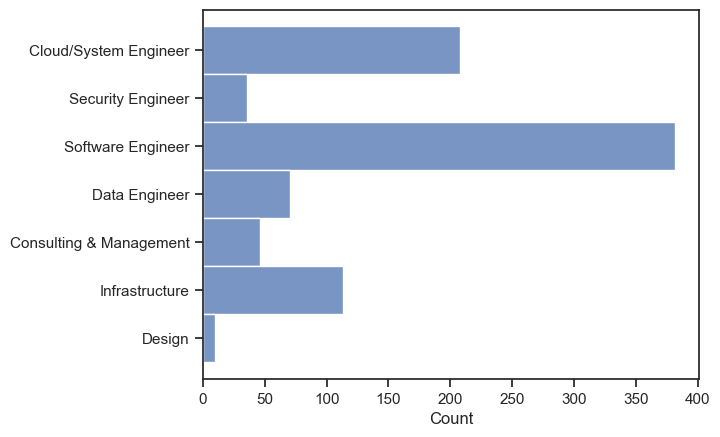

In [116]:

sns.histplot(data = df_small, y = "job_category")
plt.xlabel('Count')
plt.ylabel('')
plt.savefig("../plots/job_categories.png", bbox_inches='tight')

## Workplace

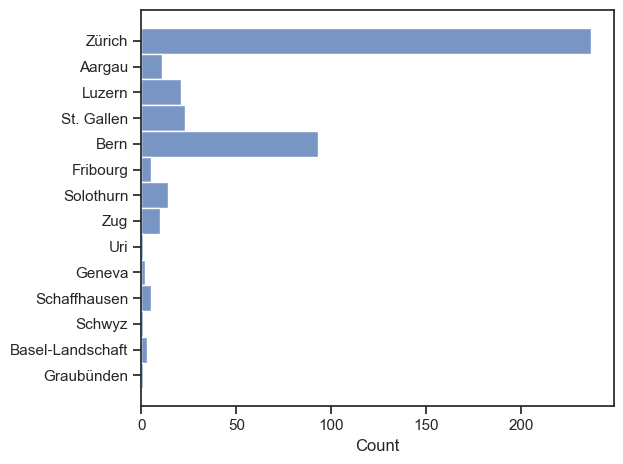

In [117]:
sns.histplot(data = df_small, y = "canton")
plt.xlabel('Count')
plt.ylabel('')
plt.tight_layout()
plt.savefig("../plots/job_locations.png", bbox_inches='tight')

## Employer

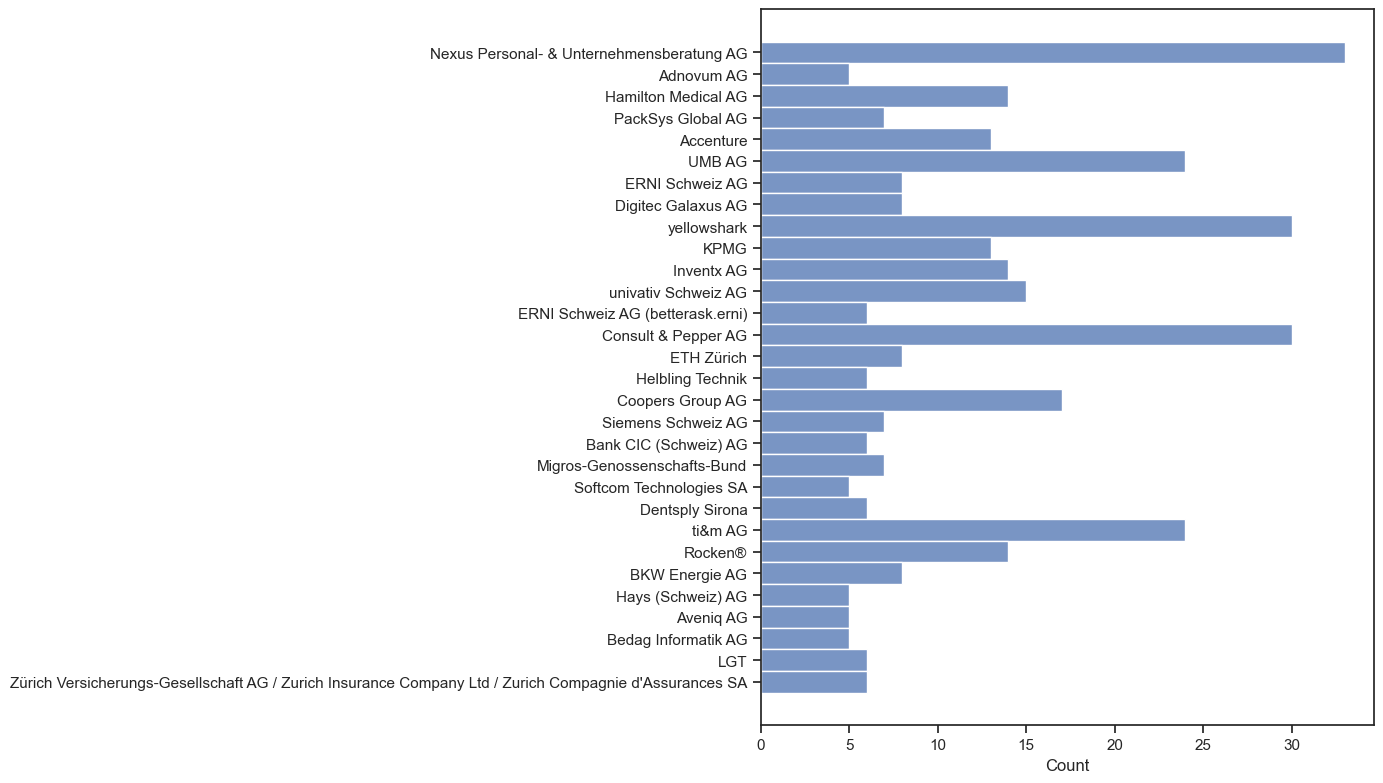

In [118]:
company_counts = df_small['company'].value_counts()
company_hist_df = df_small[df_small['company'].isin(company_counts.nlargest(30).index)]
plt.figure(figsize=(14, 8))
sns.histplot(data =company_hist_df, y = "company")

plt.xlabel('Count')
plt.ylabel('')
plt.tight_layout()
plt.savefig("../plots/job_companies.png")

## Job Level

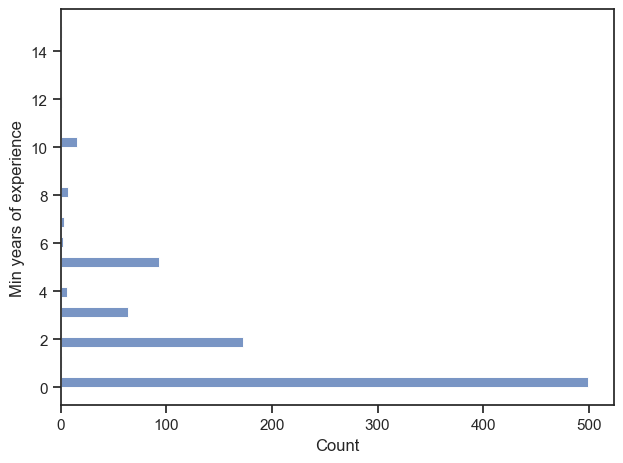

In [119]:
sns.histplot(data =df_small, y = "max_years")
plt.xlabel('Count')
plt.ylabel('Min years of experience')
plt.tight_layout()
plt.savefig("../plots/histogram_max_years.png")

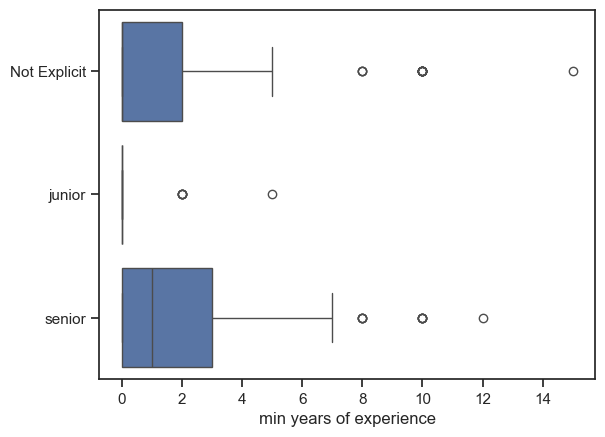

In [120]:
sns.boxplot(data =df_small, x = "max_years", y="career_stage_cleaned")

plt.xlabel('min years of experience')
plt.ylabel('')
plt.savefig("../plots/seniority.png", bbox_inches='tight')

In [121]:
df_small.groupby(["career_stage_cleaned" ])["max_years"].describe()

,count,mean,std,min,25%,50%,75%,max
career_stage_cleaned,,,,,,,,
Not Explicit,648.0,1.378086,2.091555,0.0,0.0,0.0,2.0,15.0
junior,27.0,0.555556,1.187542,0.0,0.0,0.0,0.0,5.0
senior,190.0,2.031579,2.658530,0.0,0.0,1.0,3.0,12.0


## Time

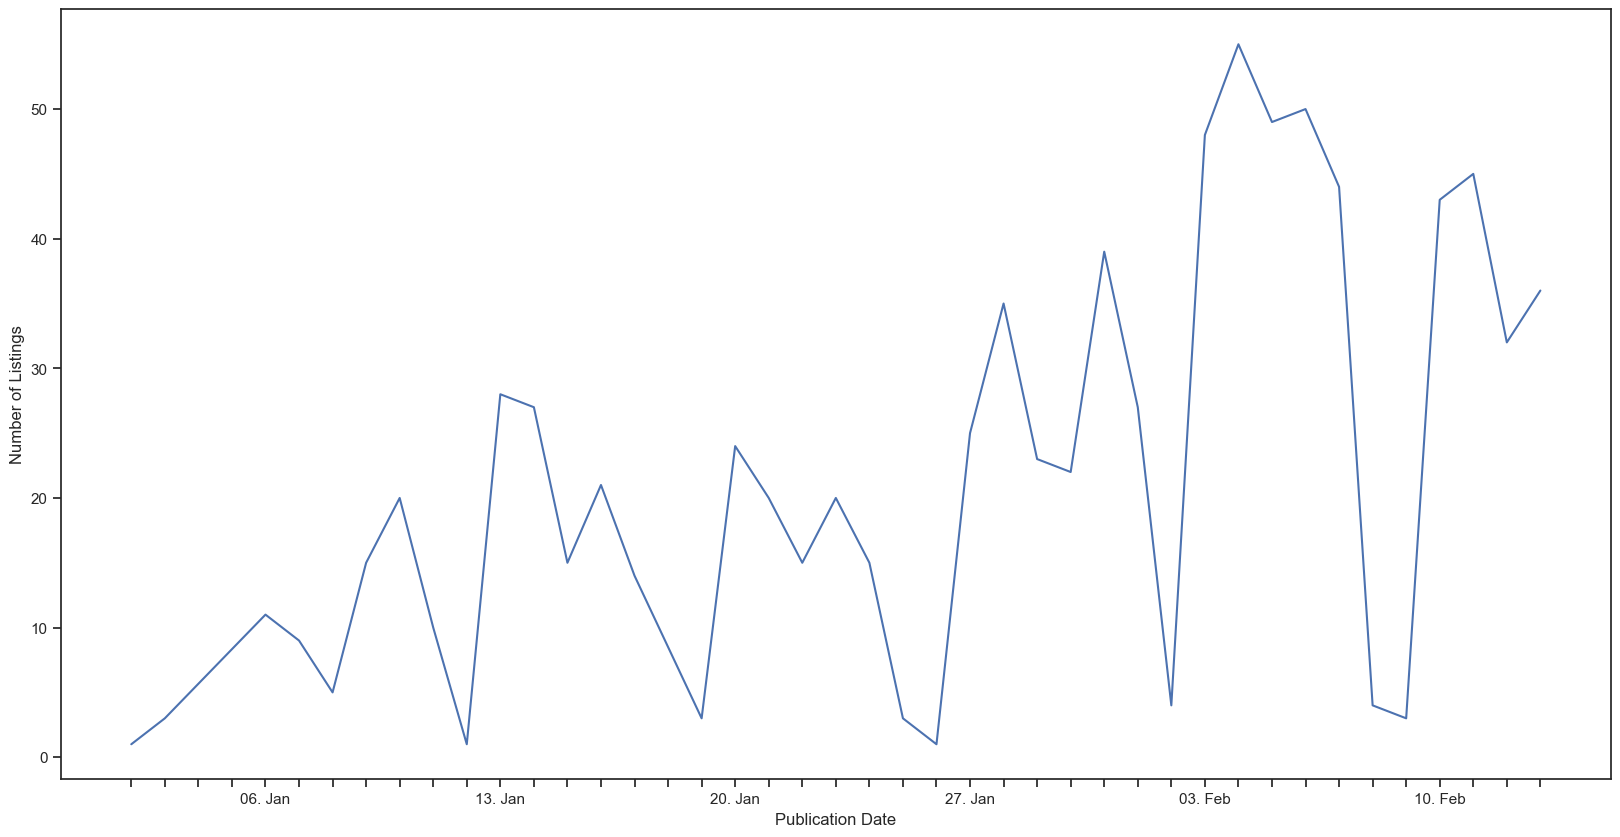

In [122]:

df_grouped = df_small.groupby(df_small['publication_date'].dt.to_period('D')).size().reset_index(name='count')
df_grouped['publication_date'] = df_grouped['publication_date'].dt.start_time
plt.figure(figsize=(20, 10))

sns.lineplot(data=df_grouped, x='publication_date', y='count')


plt.xticks(
    ticks=pd.date_range(df_grouped['publication_date'].min(), df_grouped['publication_date'].max(), freq='D'),
    labels=['' if d.weekday() != 0 else d.strftime('%d. %b') for d in pd.date_range(df_grouped['publication_date'].min(), df_grouped['publication_date'].max(), freq='D')],
    rotation=0
)
plt.xlabel('Publication Date')
plt.ylabel('Number of Listings')
plt.savefig("../plots/time.png", bbox_inches='tight')
plt.show()

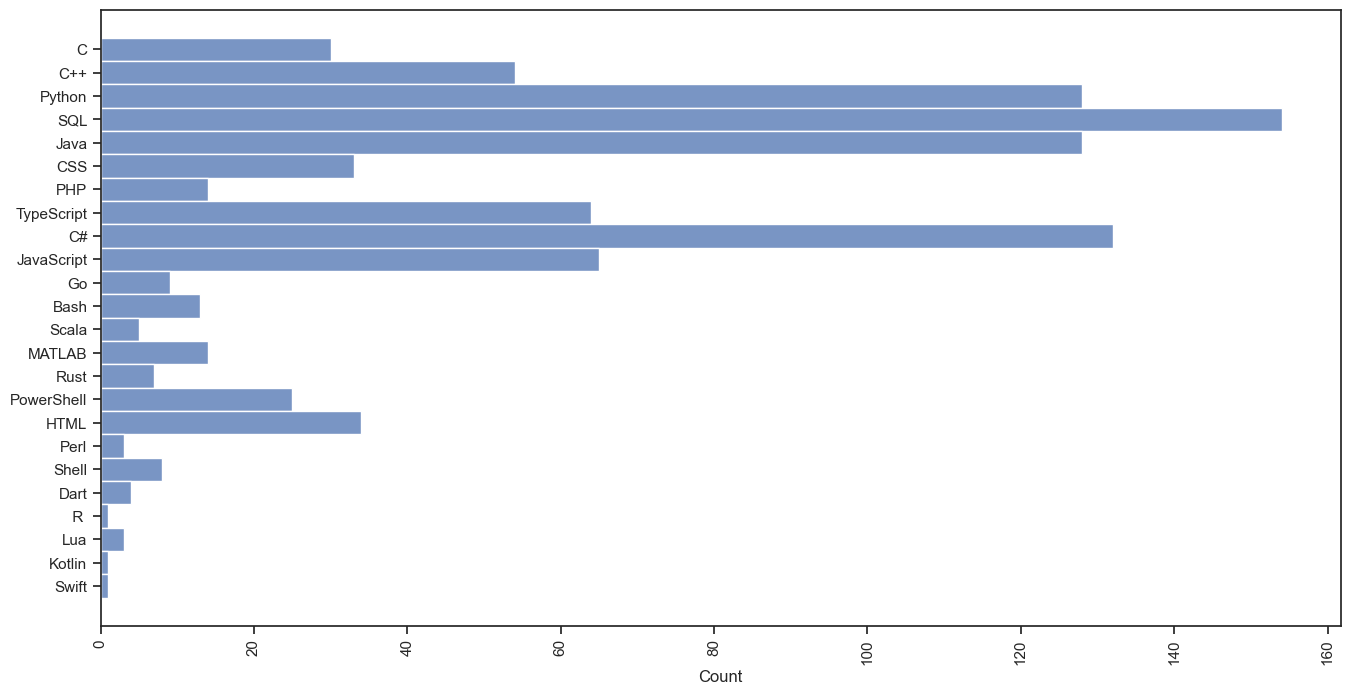

In [124]:
flat_list = [item for sublist in df_small["programming_languages"] for item in sublist]
plt.figure(figsize=(16, 8))
sns.histplot(y = flat_list, bins=10)
plt.xticks(rotation=90)


plt.savefig("../plots/languages.png", bbox_inches='tight')

plt.show()


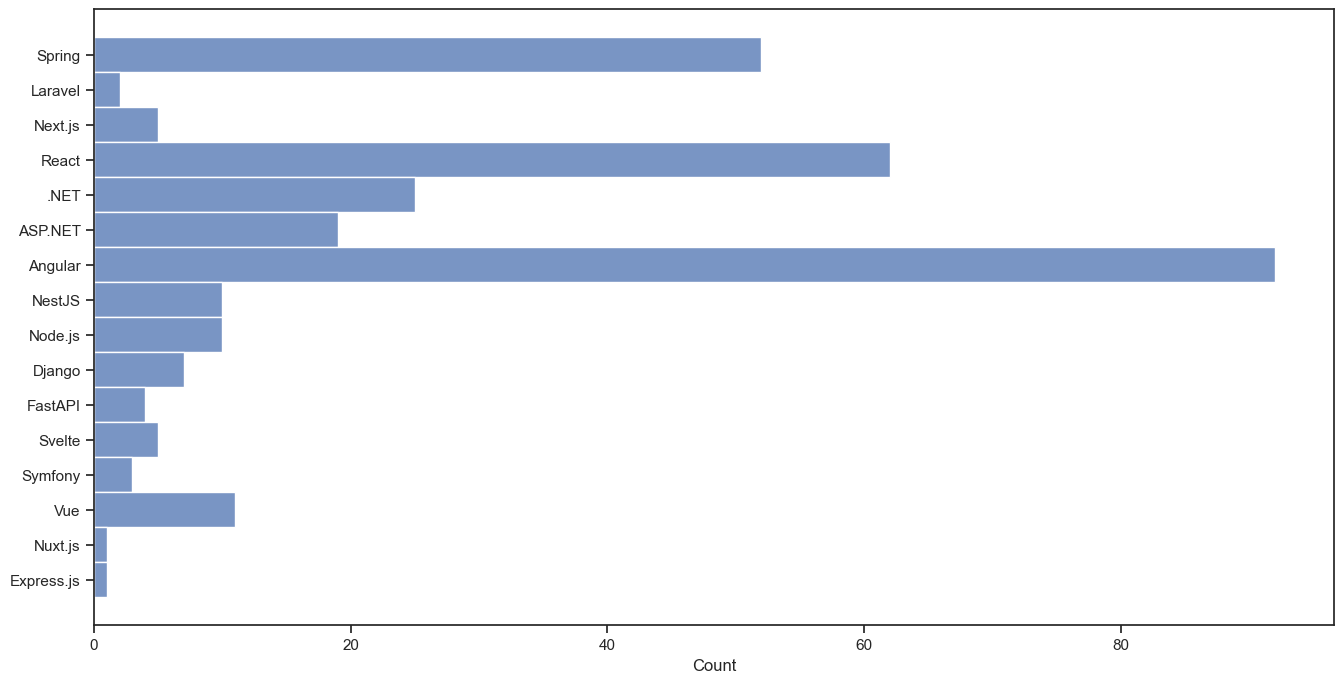

In [125]:
## Frameworks
flat_list = [item for sublist in df_small["frameworks"] for item in sublist]
plt.figure(figsize=(16, 8))
sns.histplot(y = flat_list, bins=10)


plt.savefig("../plots/frameworks.png", bbox_inches='tight')
plt.show()


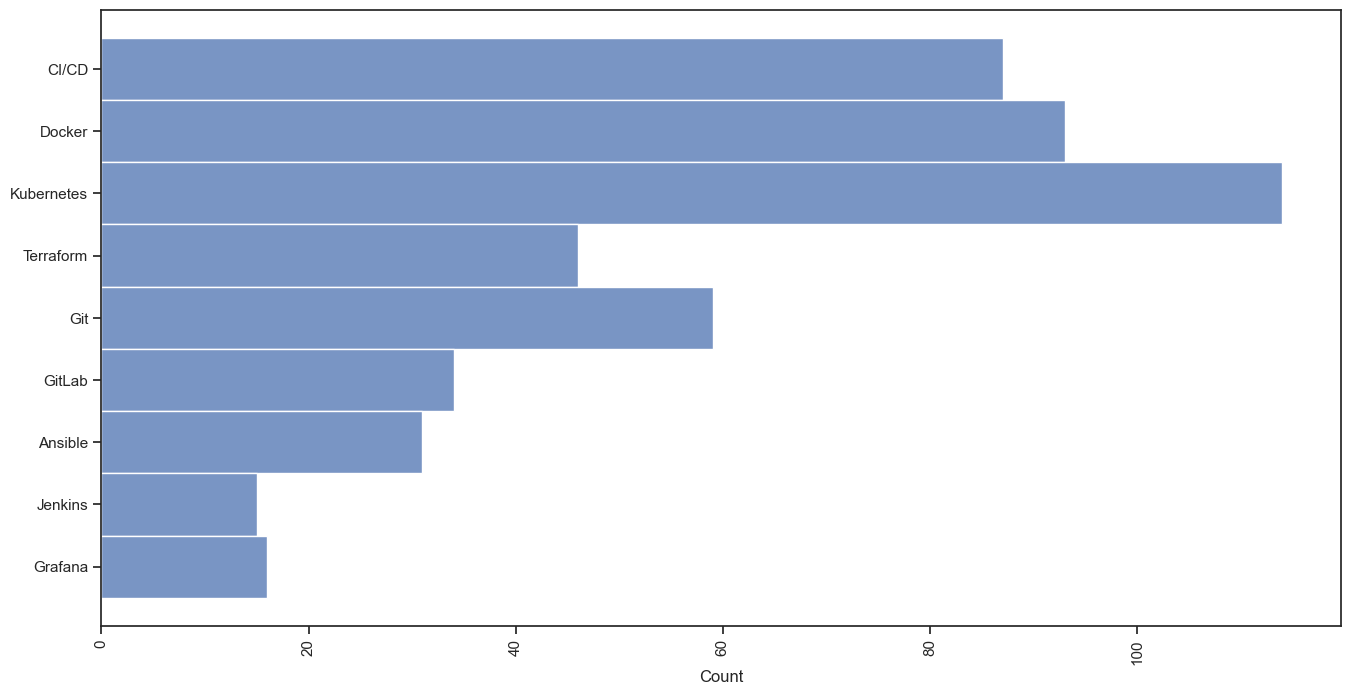

In [126]:
## Tools
flat_list = [item for sublist in df_small["tools"] for item in sublist]
plt.figure(figsize=(16, 8))
sns.histplot(y = flat_list, kde=False, bins=10)
plt.xticks(rotation=90)
plt.savefig("../plots/tools.png", bbox_inches='tight')
plt.show()


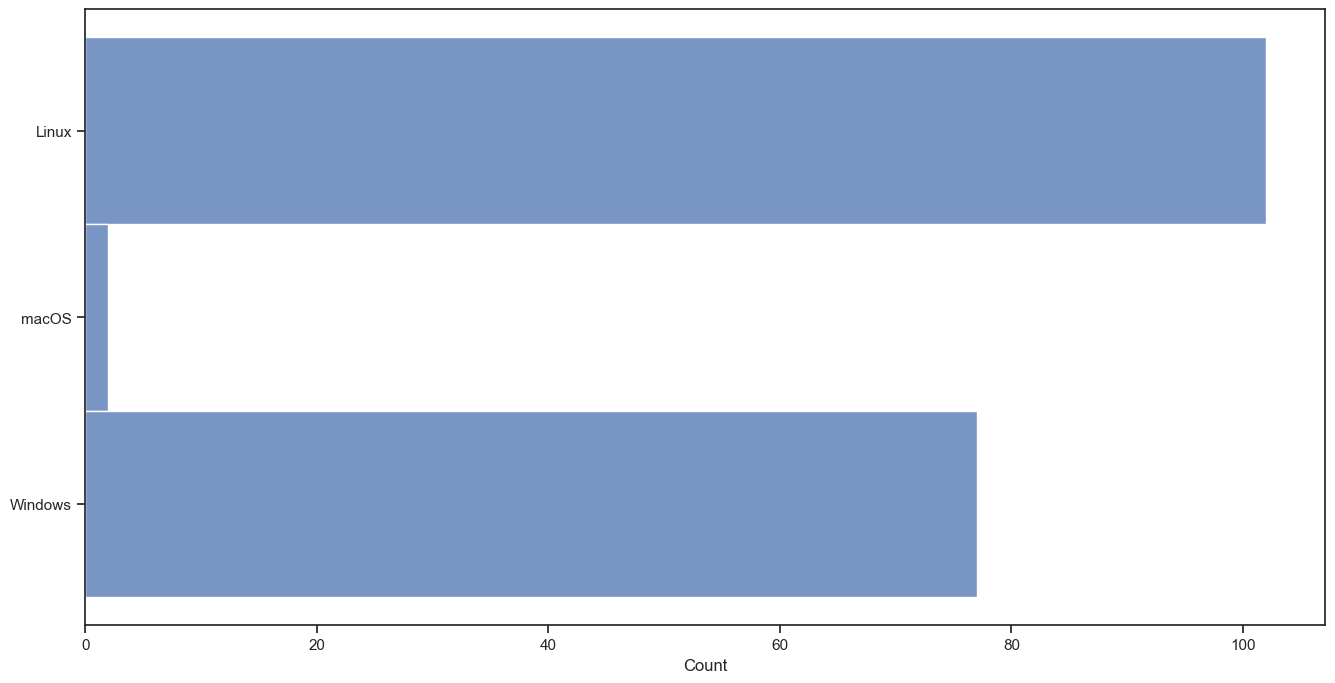

In [127]:

flat_list = [item for sublist in df_small["operating_systems"] for item in sublist]
plt.figure(figsize=(16, 8))
sns.histplot(y = flat_list, bins=10)

plt.show()

## My Interests

In [128]:
df_good = df_small[df_small['job_category'].isin(['Software Engineer', 'Data Engineer', 'Design'])]
df_good = df_good[
    (df_good['max_years'] <= 2) | 
    (df_good['programming_languages'].apply(lambda x: "Python" in x)) | 
    (df_good['job_category'] == 'Data Engineer')
]
df_good = df_good[df_good['canton'].isin(["Zürich"])]
df_good = df_good[df_good['career_stage_cleaned']!= "senior"]
df_good = df_good[df_good['publication_date']>='2025-02-01']
df_good.sort_values('publication_date')

,descriptions,downloaded,job_title,search_query,url,career_stage_cleaned,canton,programming_languages,frameworks,tools,...,place_of_work,publication_date,website,job_title_cleaned,job_category,contract_type,language,workload,salary,max_years
2766,[{'1': []}],True,Android Software Engineer,all jobs,https://www.itjobs.ch/jobs/android-software-en...,Not Explicit,Zürich,[],[],[],...,Zürich,2025-02-01,ITJobs,Software Engineer,Software Engineer,NaN,NaN,NaN,NaN,0
1479,[{'1': []}],True,Junior Webapplikationsentwickler (a) für abwec...,all jobs,https://www.itjobs.ch/jobs/junior-webapplikati...,junior,Zürich,[],[],[],...,Stadt Zürich,2025-02-01,ITJobs,Applikationsentwickler,Software Engineer,NaN,NaN,NaN,NaN,0
19,"[{'0': ['Du entwickelst, simulierst und testes...",True,Automation Software Engineer,software engineer,https://www.jobs.ch/en/vacancies/detail/1277f0...,Not Explicit,Zürich,[],[],[],...,"Spitalstrasse 38, 8630 Rüti ZH",2025-02-03,NaN,Software Engineer,Software Engineer,Unlimited employment,"German (Fluent), English (Fluent)",100%,NaN,0
2940,[],True,Software Entwickler Java (w/m) 80-100%,software engineer,https://www.jobs.ch/en/vacancies/detail/f32dcb...,Not Explicit,Zürich,[],[],[],...,Zürich,2025-02-03,Jobs,Software Entwickler,Software Engineer,Unlimited employment,"German (Fluent), English (Fluent)",80 – 100%,CHF 85 000 - 100 000 /year,0
2632,"[{'0': ['Softwareentwicklung', 'Softwaredesign...",True,Software Developer für ein dynamisches Scrum-T...,software engineer,https://www.jobs.ch/en/vacancies/detail/c3ef0a...,Not Explicit,Zürich,[Java],[],"[CI/CD, Docker, Kubernetes]",...,"Technoparkstrasse 1, 8005 Zürich",2025-02-03,NaN,Software Developer,Software Engineer,Unlimited employment,German (Fluent),70 – 100%,NaN,0
1828,[{'0': ['Du bist für die Neu- und Weiterentwic...,True,(Junior) Software Engineer C#/.NET (80 – 100%)...,software engineer,https://www.jobs.ch/en/vacancies/detail/93a0c1...,junior,Zürich,"[C#, TypeScript]",[Angular],[],...,Zürich,2025-02-03,NaN,Software Engineer,Software Engineer,Unlimited employment,"German (Fluent), English (Intermediate)",80 – 100%,NaN,2
1368,[{'0': ['Durchführung detaillierter Analysen u...,True,Performance Data Analyst,data scientist,https://www.jobs.ch/en/vacancies/detail/ef6284...,Not Explicit,Zürich,[],[],[],...,8001 Zürich,2025-02-04,NaN,Data Analyst,Data Engineer,Unlimited employment,German (Intermediate),80 – 100%,NaN,2
2091,[{'0': ['Spannende und innovative Datenprojekt...,True,Data Architect,data engineer,https://www.jobs.ch/en/vacancies/detail/831a20...,Not Explicit,Zürich,"[Python, SQL]",[],[],...,"Buckhauserstrasse 24, 8048 Zürich",2025-02-04,NaN,Data Architect,Data Engineer,Unlimited employment,"German (Fluent), English (Fluent)",80 – 100%,NaN,8
2566,[{'0': ['Spannende und innovative Datenprojekt...,True,Data Architect,software engineer,https://www.jobs.ch/en/vacancies/detail/831a20...,Not Explicit,Zürich,"[Python, SQL]",[],[],...,"Buckhauserstrasse 24, 8048 Zürich",2025-02-04,NaN,Data Architect,Data Engineer,Unlimited employment,"German (Fluent), English (Fluent)",80 – 100%,NaN,8
3264,[{'0': ['Du entwickelst cloudfähige Softwarelö...,True,Full Stack Software Engineer (m/w/d),software engineer,https://www.jobs.ch/en/vacancies/detail/24cdbe...,Not Explicit,Zürich,"[C#, Go, Java, TypeScript]","[Angular, React, Spring]",[Kubernetes],...,"Basel, Zürich oder Bern",2025-02-05,NaN,Software Engineer,Software Engineer,Unlimited employment,"German (Fluent), English (Intermediate)",100%,NaN,0


In [129]:
for _, row in df_good.sort_values('publication_date').iterrows():

    print(f'{row.job_title}: {row.url} , {row.company}' )

Android Software Engineer: https://www.itjobs.ch/jobs/android-software-engineer/116805/ , Adnovum AG
Junior Webapplikationsentwickler (a) für abwechslungreiche Kundenprojekte: https://www.itjobs.ch/jobs/junior-webapplikationsentwickler-a-fur-abwechslungreiche-kundenprojekte/111820/ , Nexus Personal- & Unternehmensberatung AG
Automation Software Engineer: https://www.jobs.ch/en/vacancies/detail/1277f0a7-f931-4594-a7de-2cd2e36cade2/ , PackSys Global AG
Software Entwickler Java (w/m) 80-100%: https://www.jobs.ch/en/vacancies/detail/f32dcbca-7eda-4e5b-a322-48cf6725bf2e/ , yellowshark
Software Developer für ein dynamisches Scrum-Team (m/w/d): https://www.jobs.ch/en/vacancies/detail/c3ef0a23-8922-477d-9443-54b74c04e7ec/ , Supercomputing Systems AG
(Junior) Software Engineer C#/.NET (80 – 100%) (a): https://www.jobs.ch/en/vacancies/detail/93a0c1af-55be-4e21-80e4-cf504a4d67d1/ , Consult & Pepper AG
Performance Data Analyst: https://www.jobs.ch/en/vacancies/detail/ef6284e8-e5d0-4653-954d-cc8a93

<Axes: xlabel='Count', ylabel='company'>

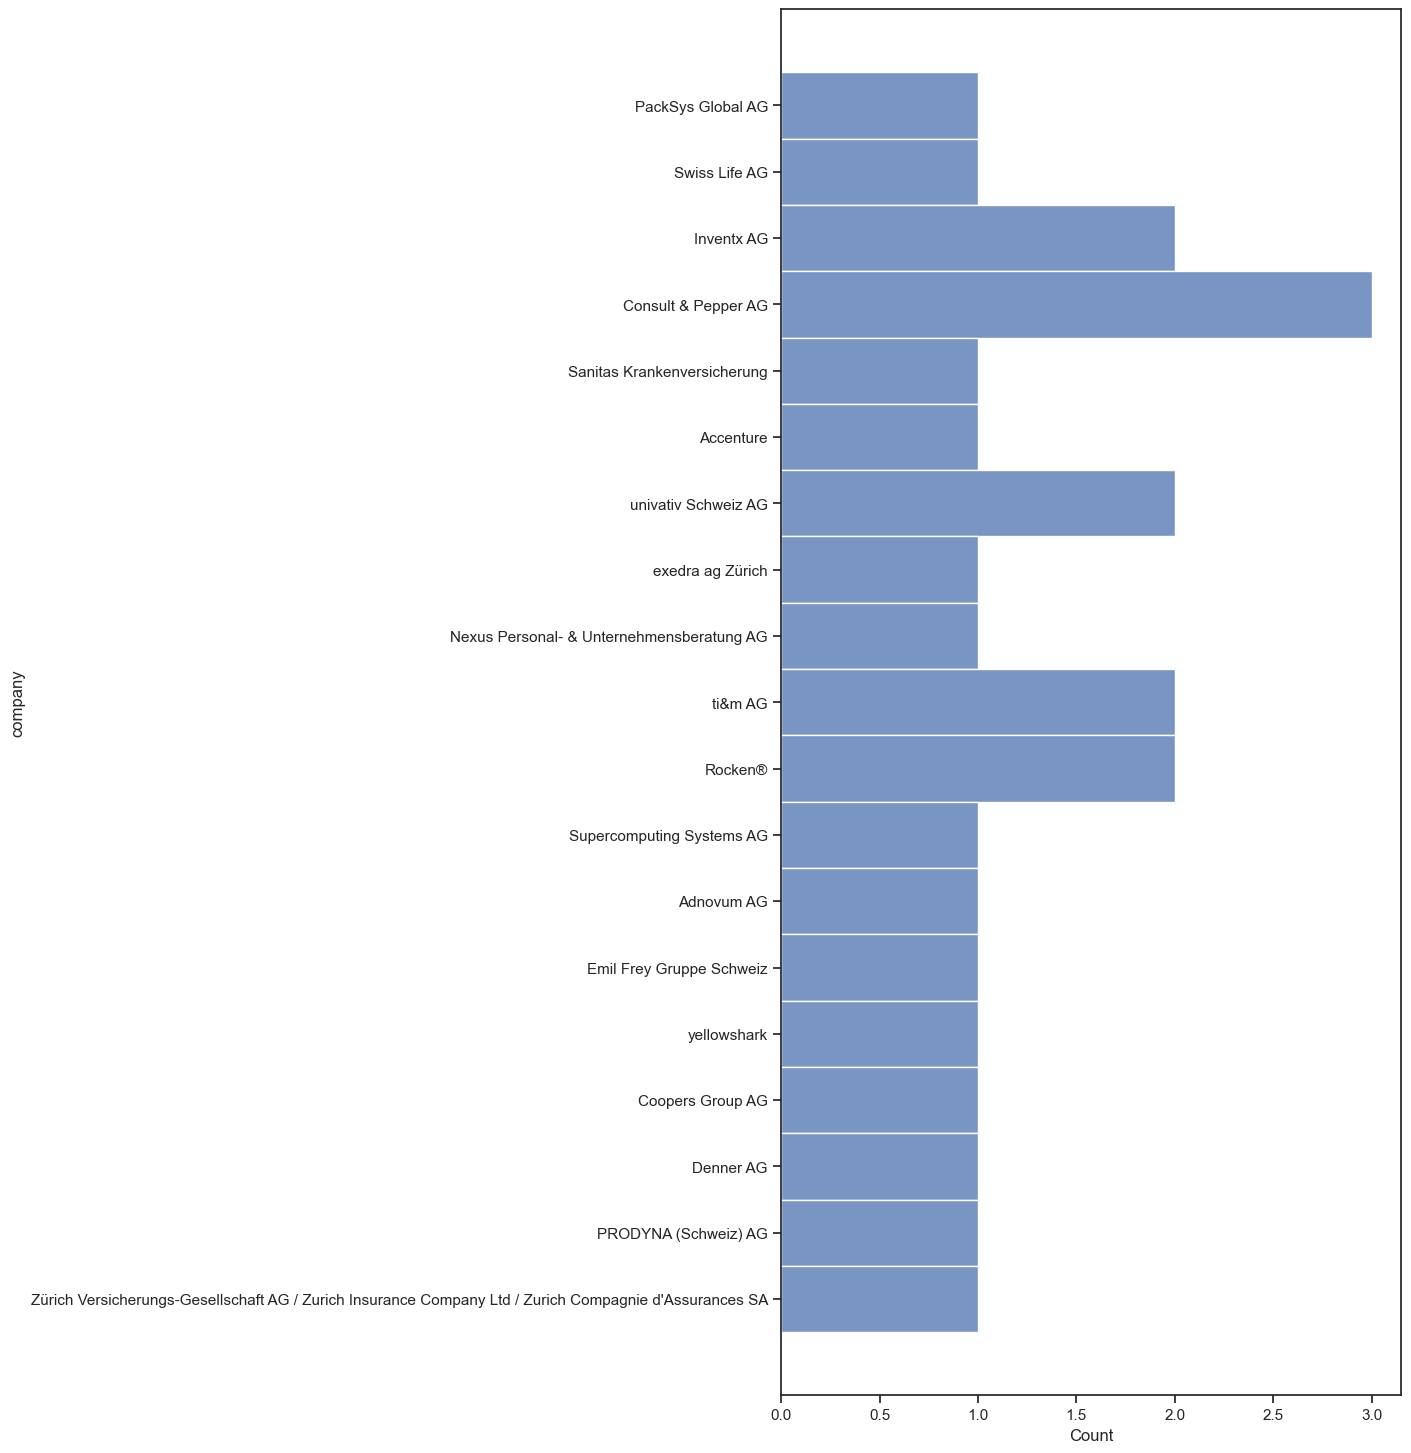

In [130]:

plt.figure(figsize=(8, 18))
sns.histplot(data =df_good, y = "company")